<a href="https://www.kaggle.com/code/ngngan023/eda-rfm-analysis-e-commerce-dataset-python?scriptVersionId=135938899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction

## 1.1 Purpose
This report aims to **explore** the transnational data and find any insights that can be useful for the company. Besides, the report also includes the **RFM analysis**. 

From there, the company can improve the customer management & marketing strategy to be **more effective, efficient, and appropriate**.

## 1.2 Content
This is a transnational data set which contains all the **transactions** occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered **non-store online retail**.The company mainly **sells unique all-occasion gifts**. Many customers of the company are wholesalers.

# 2. Prepare

## 2.1. Define To-Do Things
 1. Preprocess data
 2. Solve sales-related questions of this e-commerce transactional data (EDA)
 2. Do a RFM analysis
 3. Review & Give recommendations

## 2.2. Import Libraries

Import needed libraries for the analysis & report.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import datetime as dt #preprocessing data

In [2]:
#Read the dataset
df_ = pd.read_csv('/kaggle/input/ecommerce-data/data.csv',encoding= 'unicode_escape')
#Create a copy to use
df = df_.copy()
#Take a look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2.3. Data Dictionary


In [3]:
#Get to know the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


This table shows the column names & their meanings.

|No.   |**Column Name**     | **Explanation**   |                                                          
|---   | --------- | -----------------------------------------------------------------------------------------------------------|   
|1   |InvoiceNo      | Invoice number is a 6-digit number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
|2   |StockCode     | Product code is a 5-digit number uniquely assigned to each distinct product.
|3   |Description    |Product description. A short text includes basic information of the products, such as name, color, material, etc.
|4   |Quantity       | An integer shows the quantities of each product in the transaction.
|5   |InvoiceDate | Datetime format. The day and time when each transaction was generated.
|6   |UnitPrice     |Unit price. Product price per unit.
|7   |CustomerID   | Customer identification number. A 5-digit number uniquely assigned to each customer.
|8   |Country       |Country name. The name of the country where each customer resides.

In [4]:
#Take a look at the basic figures of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**Comments**: 
 - There are **negative values** in **Quantity** and **UnitPrice**, which seems illogical **&rarr;** check & handle it later.

## 2.4. Data Pre-processing

This part will **deal with common errors** in our dataset, such as duplicates, missing values, data types, etc.

**&rarr;** **Improve the quality of the data** and to make it more suitable and accessible for later analyzing

### 2.4.1. Check & Remove Duplicates

In [5]:
#Use 'sum()' and 'duplicated()' to check
sum(df.duplicated())

5268

- There are **5268 duplicated rows**. Now, we remove it.

In [6]:
#Use 'drop_duplicates()' to remove those duplicates. We make it on the 'df' object directly
df = df.drop_duplicates()

#Re-check the df
sum(df.duplicated())

0

- The output: 0 **&rarr;** The duplicates are removed all.

### 2.4.2. Check & Handle Missing Values

In [7]:
#Check missing values
print (df.isnull().sum())
print ('--------------------------')

#Can these missing values affect the analysis?
print (df.isnull().mean()*100)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64
--------------------------
InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


- To the **Description** column, it's fine to replace missing values with **'Unknown'** because **the figure (1454) missing values** is small (approximately 0.3%) compared to the whole. Besides, this report mainly focus on the RFM and sales questions. We aren't going to dive deep in product analysis.

- To the **CustomerID** column, the missing values are **135037**, which account for around 25%. So, we **can't drop** all these transactions, it will affect the sales exploratory data analysis **&rarr;** Let's first replace these missing values with **'00000'**

In [8]:
#Fill the missing values in 'Description' column with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

#Fill the missing values in 'CustomerID' column with '00000'
df['CustomerID'] = df['CustomerID'].fillna('00000')

In [9]:
#Re-checking after handling the missing values
print (df.isnull().sum())
print ('----------------------------------------------')
print (df.info())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  object 
 7   Country      536641 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.8+ MB
None


### 2.4.3. Check & Handle Data Types

In [10]:
#Look at the data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

For analysis, it's necessary to change :
> **'CustomerID'** column to **integer**

> **'InvoiceDate'** column to **datetime**

In [11]:
#Convert 'CustomerID' from float to int
df = df.astype({"CustomerID": int})

#Convert 'InvoiceDate' from object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Re-check
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

### 2.4.4. Add Needed Columns

Add needed columns for our EDA process:
> the **'Price'** column by multiplying **Unit Price** and **Quantity** : to calculate overall total sales

> the **'Year'** and **'YearMonth'** column from **Invoice Date** : to track the sales over time

In [12]:
#Make 'Year' column
df.insert(5,'Year',df['InvoiceDate'].dt.year)

#Make 'YearMonth' column
df.insert(6,'YearMonth',df['InvoiceDate'].dt.to_period('M'))

#Make 'Price' column
df.insert(8,'Price',df['Quantity'] * df ['UnitPrice'])

#Re-check
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year,YearMonth,UnitPrice,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,2010-12,2.55,15.30,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,2010-12,3.39,20.34,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,2010-12,2.75,22.00,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,2010-12,3.39,20.34,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,2010-12,3.39,20.34,17850,United Kingdom


### 2.4.5. Other Errors

In [13]:
#Look at numerical figures of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
Year,536641.0,2010.921771,0.268532,2010.00,2011.00,2011.00,2011.00,2011.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
Price,536641.0,18.123861,380.656263,-168469.60,3.75,9.87,17.40,168469.6
CustomerID,536641.0,11435.904653,6795.044250,0.00,0.00,14336.00,16241.00,18287.0


There is a negative value in **Quantity & Unit Price**, leading to a negative in **Price** **&rarr;** irrational

In [14]:
#Look at negative 'Quantity'
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year,YearMonth,UnitPrice,Price,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,2010,2010-12,27.50,-27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,2010,2010-12,4.65,-4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,2010,2010-12,1.65,-19.80,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,2010,2010-12,0.29,-6.96,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,2010,2010-12,0.29,-6.96,17548,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,2011,2011-12,0.83,-9.13,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,2011,2011-12,224.69,-224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,2011,2011-12,10.95,-54.75,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,2011,2011-12,1.25,-1.25,17315,United Kingdom


These **negative-value quantities** are the transactions have been **cancelled** (it has a **'C'** in **InvoiceNo**)

**&rarr;** **pull all 10587 rows into the other new dataframe** so that our later calculation (such as sold quantity summary, sales) can't be affected.

In [15]:
#Dataframe called 'cancel_data' contains cancelled transactions.
cancel_data = df[df['Quantity']<0]
cancel_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year,YearMonth,UnitPrice,Price,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,2010,2010-12,27.50,-27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,2010,2010-12,4.65,-4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,2010,2010-12,1.65,-19.80,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,2010,2010-12,0.29,-6.96,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,2010,2010-12,0.29,-6.96,17548,United Kingdom


In [16]:
#Drop transactions that have negative quantities in the df
index_cancel_mask1 = df[df['Quantity']<0].index
df.drop(index_cancel_mask1, inplace = True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526054.0,10.730874,157.591838,1.00,1.00,4.00,11.00,80995.00
Year,526054.0,2010.921696,0.268649,2010.00,2011.00,2011.00,2011.00,2011.00
UnitPrice,526054.0,3.871747,42.016560,-11062.06,1.25,2.08,4.13,13541.33
Price,526054.0,20.188016,272.250300,-11062.06,3.90,9.92,17.70,168469.60
CustomerID,526054.0,11413.244024,6812.689104,0.00,0.00,14334.00,16242.00,18287.00


Now, check the **negative values** in **Price** to see what happened.

In [17]:
#Look at the rows contain negative prices
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year,YearMonth,UnitPrice,Price,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,2011,2011-08,-11062.06,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,2011,2011-08,-11062.06,-11062.06,0,United Kingdom


- These two rows are "**Adjust bad debt**" so we can remove them from the dataframe.

In [18]:
#Deleting the two rows
index_cancel_mask2 = df[df['UnitPrice'] < 0].index
df.drop(index_cancel_mask2, inplace = True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526052.0,10.730911,157.592136,1.0,1.00,4.00,11.00,80995.00
Year,526052.0,2010.921696,0.268650,2010.0,2011.00,2011.00,2011.00,2011.00
UnitPrice,526052.0,3.913818,36.053205,0.0,1.25,2.08,4.13,13541.33
Price,526052.0,20.230150,271.391911,0.0,3.90,9.92,17.70,168469.60
CustomerID,526052.0,11413.287416,6812.665708,0.0,0.00,14334.00,16242.00,18287.00


In [19]:
#Check
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  526052 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   Year         526052 non-null  int64         
 6   YearMonth    526052 non-null  period[M]     
 7   UnitPrice    526052 non-null  float64       
 8   Price        526052 non-null  float64       
 9   CustomerID   526052 non-null  int64         
 10  Country      526052 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[M](1)
memory usage: 48.2+ MB
None


The data now can be used for analysis.

# 3. Process

## 3.1. Exploratory Data Analysis
This part will answer some **most common questions** related to the **sales performance** of this e-commerce dataset.

### Question 1: What Are The Top 5 Product By Sold Quantities?

In [20]:
#Product group by sold quantities
df_product_qtt = df.groupby('Description').agg({'Quantity':'sum'}).sort_values(by = 'Quantity', ascending = False).head()

#Reset index & make it a data frame 
df_product_qtt.reset_index(inplace=True)
df_product_qtt = pd.DataFrame(df_product_qtt)
df_product_qtt.columns = ['Product', 'Quantity']

print('Top 5 Products by Sold Quantity')
df_product_qtt

Top 5 Products by Sold Quantity


,Product,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3,JUMBO BAG RED RETROSPOT,48375
4,WHITE HANGING HEART T-LIGHT HOLDER,37876


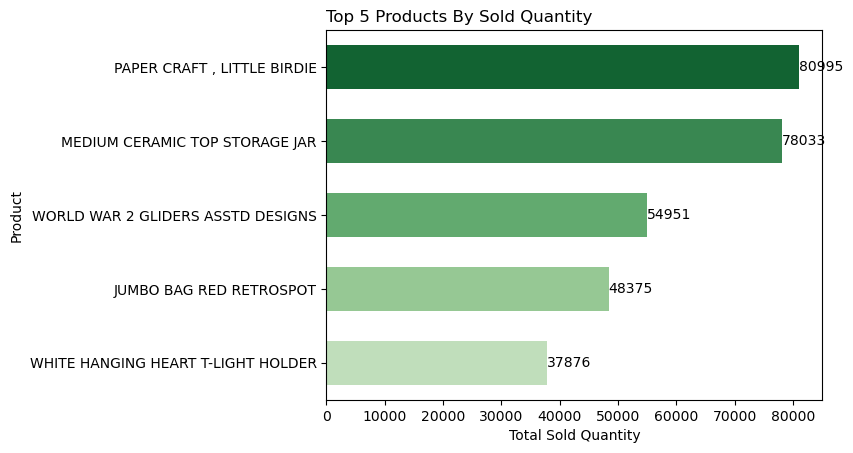

In [21]:
#Create a plot
pd_by_qtt = sns.barplot(x = df_product_qtt['Quantity'], y = df_product_qtt['Product'],palette = sns.color_palette('Greens_r'),width = 0.6)

#Adjust elements
plt.bar_label(pd_by_qtt.containers[0])
plt.xlabel('Total Sold Quantity')
plt.ylabel('Product')
plt.title('Top 5 Products By Sold Quantity',loc = 'left')
plt.show()

### Question 2: What Are The Top 5 Product By Sales?

In [22]:
#Product group by sales
df_product_sales = df.groupby('Description').agg({'Price':'sum'}).sort_values(by = 'Price', ascending = False).head(5)

#Reset index & make it a data frame 
df_product_sales.reset_index(inplace=True)
df_product_sales = pd.DataFrame(df_product_sales)
df_product_sales.columns = ['Product','Sales']

print('Top 5 Product By Sales')
df_product_sales

Top 5 Product By Sales


,Product,Sales
0,DOTCOM POSTAGE,206248.77
1,REGENCY CAKESTAND 3 TIER,174156.54
2,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3,WHITE HANGING HEART T-LIGHT HOLDER,106236.72
4,PARTY BUNTING,99445.23


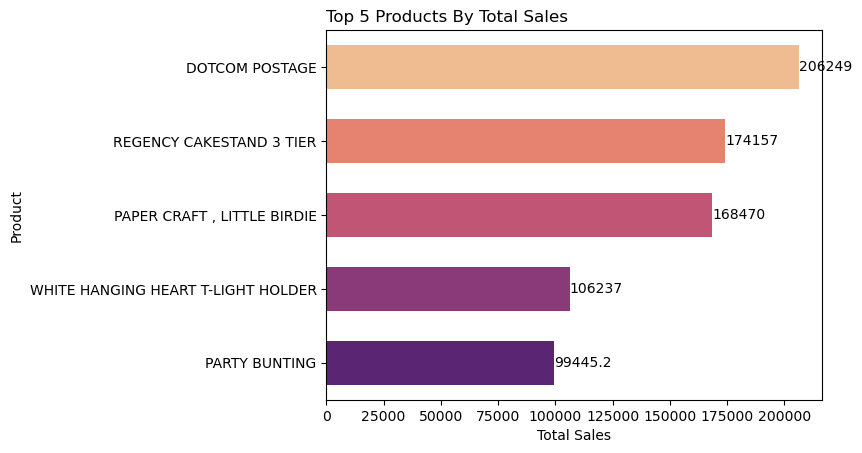

In [23]:
#Create a plot
pd_by_sales = sns.barplot(x = df_product_sales['Sales'], y = df_product_sales['Product'],palette = sns.color_palette('magma_r'),width = 0.6)

#Adjust elements
plt.bar_label(pd_by_sales.containers[0])
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top 5 Products By Total Sales',loc = 'left')
plt.show()

### Question 3: In Which Month Does The Company Achieve The Highest Revenue?    How Much Was Earned That Month?

In [24]:
#Sales group by year month
monthly_sales = df.groupby('YearMonth').agg({'Price':'sum'}).sort_values(by = 'YearMonth', ascending = True).head(20)

#Reset index & make it a data frame 
monthly_sales.reset_index(inplace=True)
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales.columns = ['YearMonth','Sales']

print('Total Sales Over Months')
monthly_sales

Total Sales Over Months


,YearMonth,Sales
0,2010-12,821452.730
1,2011-01,689811.610
2,2011-02,522545.560
3,2011-03,716215.260
4,2011-04,536968.491
5,2011-05,769296.610
6,2011-06,760547.010
7,2011-07,718076.121
8,2011-08,757841.380
9,2011-09,1056435.192


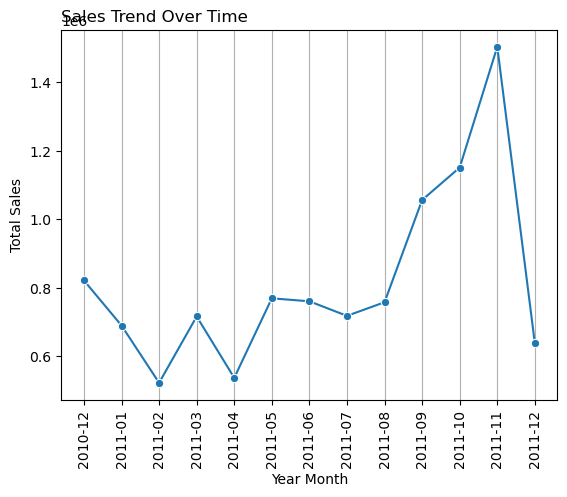

In [25]:
#Visualizing time-series sales
sales_trend = sns.lineplot(x = monthly_sales['YearMonth'].astype(str), y = monthly_sales['Sales'], marker='o')

#Adjust elements
plt.xticks(rotation=90)
plt.grid(visible=True, axis='x')
plt.xlabel('Year Month')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time',loc = 'left')
plt.show()

**Answers**:
- Sales was at peak in Nov, 2011 (~1M5)
- The company's sales **reversed continuously** in the early months (from **Jan to May**)
- In the middle, a quite **stable trend appeared** (from **May to Aug**)
- Lastly, the sales **increased clearly** in the later months (from **Aug to Nov**)

### Question 4: 
### What Are The Best-Selling Products In The Highest-Revenue Month? 
### Is There Any Reason Behind The Highest Sales In Those Months?

In [26]:
pd_yearmonth = df.groupby(['YearMonth','Description']).agg({'Price':'sum'}).sort_values(by = 'Price', ascending = False).reset_index(drop = False)
top_pd_in_nov = pd_yearmonth[pd_yearmonth['YearMonth'] == '2011-11'].reset_index(drop = True).head(5)
top_pd_in_nov.columns = ['YearMonth','Product', 'Total Sales']
top_pd_in_nov

,YearMonth,Product,Total Sales
0,2011-11,DOTCOM POSTAGE,36905.40
1,2011-11,RABBIT NIGHT LIGHT,34478.40
2,2011-11,PAPER CHAIN KIT 50'S CHRISTMAS,28955.54
3,2011-11,WHITE HANGING HEART T-LIGHT HOLDER,14356.22
4,2011-11,POPCORN HOLDER,14188.80


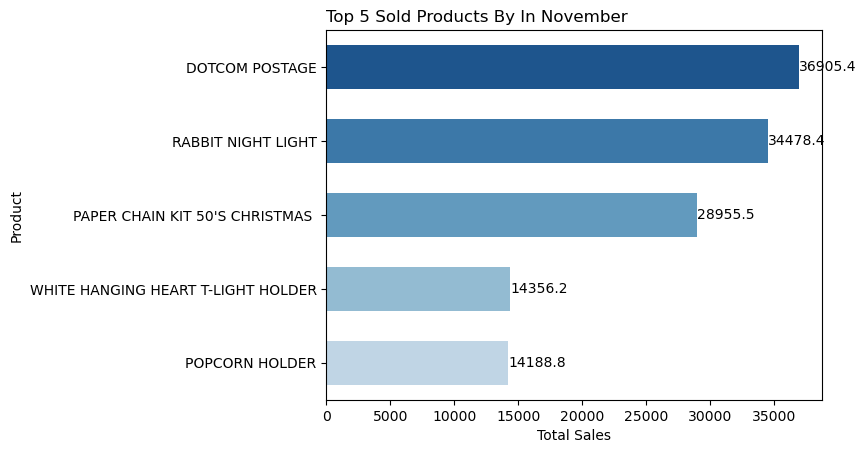

In [27]:
#Create a plot
pd_in_nov = sns.barplot(x = top_pd_in_nov['Total Sales'], y = top_pd_in_nov['Product'],palette = sns.color_palette('Blues_r'),width = 0.6)

#Adjust elements
pd_in_nov.bar_label(pd_in_nov.containers[0])
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top 5 Sold Products By In November',loc = 'left')
plt.show()

**Comments:**
- Sold products in highest revenue earned month (11-2011) are related to the Chirstmas event

**&rarr;** Company can **diversify their products** that are related to Chirstmas event to fulfil the customers' demands and generate more revenue in this high-spending occasion.

### Question 5: Which Country Does The Company Have More Orders?

In [28]:
#Counting Country
df_country = df['Country'].value_counts().sort_values(ascending = False).reset_index(drop = False).head(10)
df_country.columns = ["Country","Orders"]

print('Top 10 Country By Orders')
df_country

Top 10 Country By Orders


,Country,Orders
0,United Kingdom,481141
1,Germany,9027
2,France,8393
3,EIRE,7883
4,Spain,2480
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1959
8,Portugal,1492
9,Australia,1184


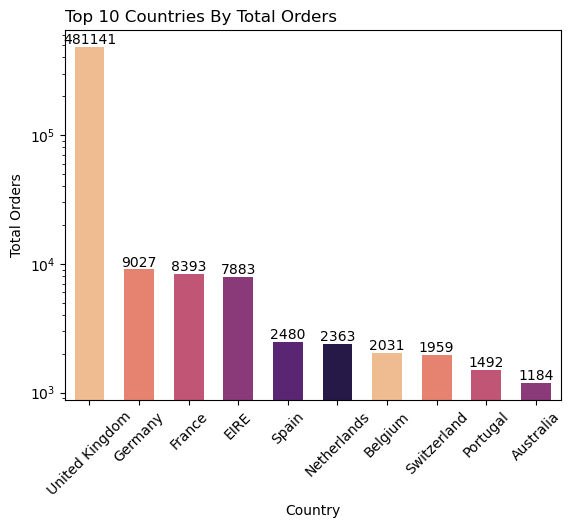

In [29]:
#Create a plot
orders_by_country = sns.barplot(x = df_country['Country'], y = df_country['Orders'], palette = sns.color_palette('magma_r'), width = 0.6)

#Adjust elements
orders_by_country.bar_label(orders_by_country.containers[0])
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Total Orders')
plt.yscale('log')
plt.title('Top 10 Countries By Total Orders',loc = 'left')
plt.show()

### Question 6: Which Product Generates Highest Revenue In The Top 3 Country? (United Kingdom, Germany, & France)

**United Kingdom, Germany and France** are the top 3 countries by total orders. 
Now, we'll figure out **which product generates highest revenue in these countries**

**&rarr;** From there, we can **improve stocking plans** or **focus** more on the **specific products**.

In [30]:
#Product sales by country
pd_sales_by_country = (
    df.groupby(['Country','Description'])
    .agg({'Price':'sum'})
    .sort_values(by = 'Price', ascending = False)
    .reset_index(drop = False)
)

In [31]:
#Top 3 products in United Kingdom
pd_UK = pd_sales_by_country[pd_sales_by_country['Country'] == 'United Kingdom'].head(3)
pd_UK['Top'] = pd_UK['Price'].rank(ascending = False)

#Top 3 products in Germany
pd_DE = pd_sales_by_country[pd_sales_by_country['Country'] == 'Germany'].head(3)
pd_DE['Top'] = pd_DE['Price'].rank(ascending = False)

#Top 3 products in France
pd_FR = pd_sales_by_country[pd_sales_by_country['Country'] == 'France'].head(3)
pd_FR['Top'] = pd_FR['Price'].rank(ascending = False)

#Summary
pd_topcountry = pd.concat([pd_UK,pd_DE,pd_FR], axis = 0).reset_index(drop = True)
pd_topcountry.columns = ['Country', 'Product', 'Sales', 'Top']

print('Top 3 Product In UK, Germany, and France')
pd_topcountry

Top 3 Product In UK, Germany, and France


,Country,Product,Sales,Top
0,United Kingdom,DOTCOM POSTAGE,206248.77,1.0
1,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",168469.60,2.0
2,United Kingdom,REGENCY CAKESTAND 3 TIER,141996.09,3.0
3,Germany,POSTAGE,21001.00,1.0
4,Germany,REGENCY CAKESTAND 3 TIER,9061.95,2.0
5,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,3563.55,3.0
6,France,POSTAGE,15454.00,1.0
7,France,Manual,9492.37,2.0
8,France,RABBIT NIGHT LIGHT,7277.20,3.0


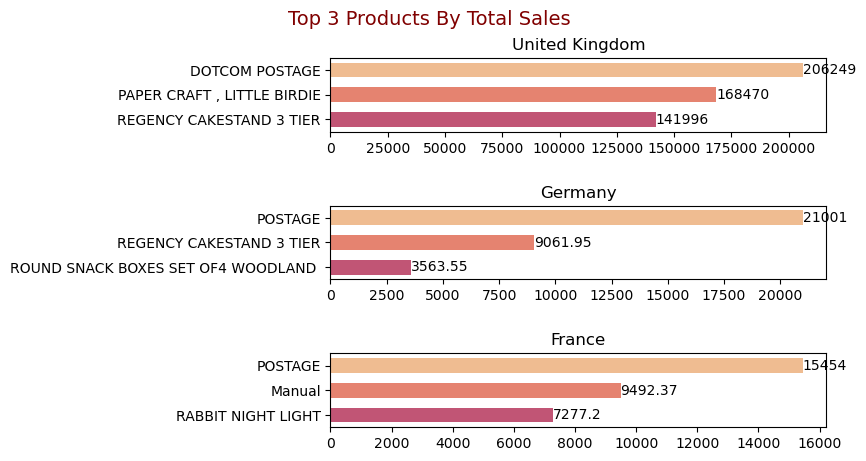

In [32]:
#Create a plot
fig, axs = plt.subplots(nrows=3)

ax1 = sns.barplot(x= pd_UK['Price'], y= pd_UK['Description'], palette = sns.color_palette('magma_r'),width = 0.6, ax=axs[0])
ax2 = sns.barplot(x= pd_DE['Price'], y= pd_DE['Description'], palette = sns.color_palette('magma_r'),width = 0.6, ax=axs[1])
ax3 = sns.barplot(x= pd_FR['Price'], y= pd_FR['Description'], palette = sns.color_palette('magma_r'),width = 0.6, ax=axs[2])

#Adjust elements & layout
ax1.set(title = 'United Kingdom', xlabel=None,ylabel = None)
ax2.set(title = 'Germany', xlabel=None,ylabel = None)
ax3.set(title = 'France', xlabel=None,ylabel = None)
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])

fig.suptitle("Top 3 Products By Total Sales", fontsize=14 ,ha = 'right', color = 'maroon')
fig.subplots_adjust(hspace=1)
fig.show();

**Comments**:
- There is a quite similar rank of best-selling products. The **postage** product consistently **ranked no.1** in those countries.
- As previous observations, products are pretty related to the parties or Chirstmas event.
- The distance between sales of products in the Germany is impressive (**Postage** is **2.3 times** higher compared to **Cakestand**, and almost **6 times to the top-3 product**) **&rarr;** this figure would be helpful to the company's stocking plans.

## 3.2. RFM Analysis

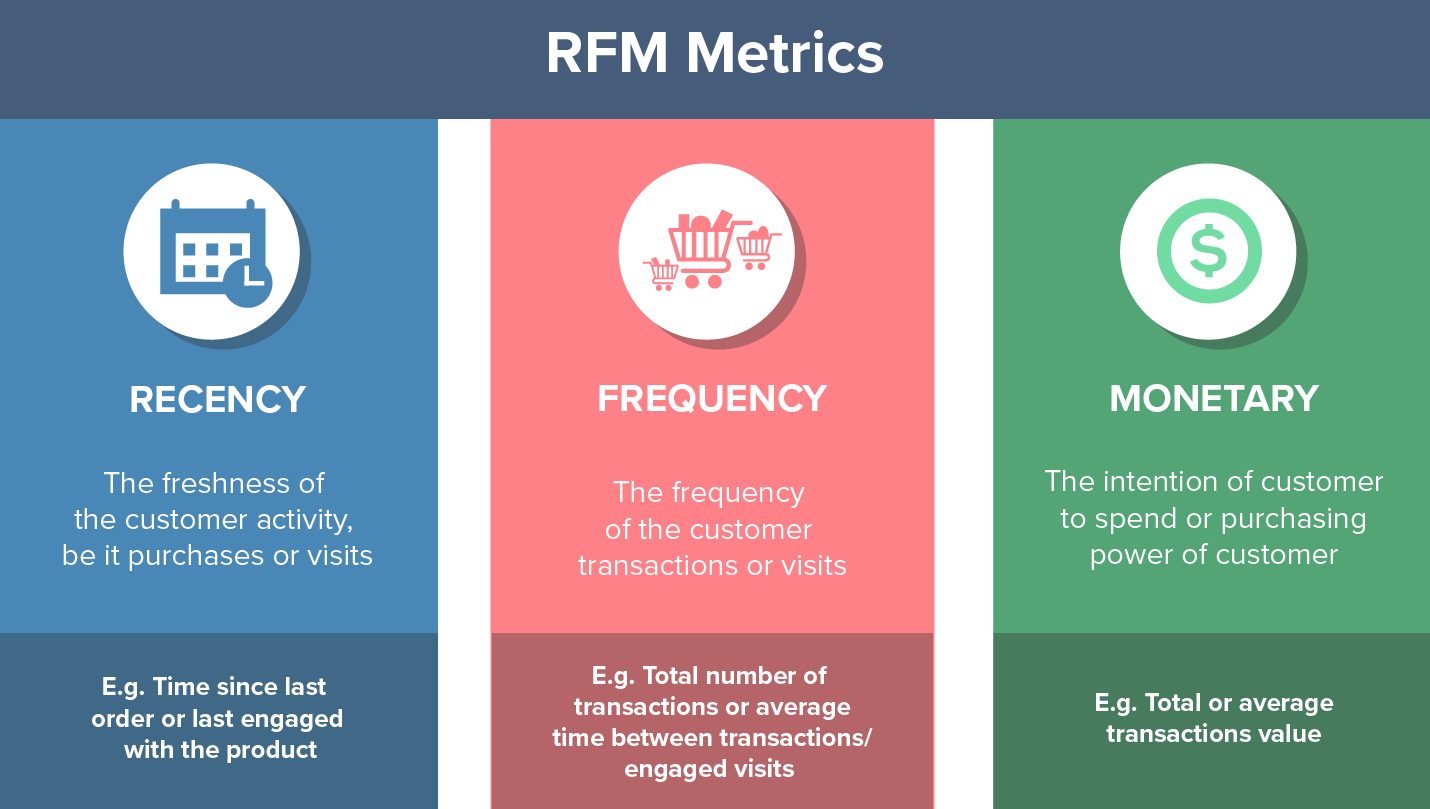

- To do a RFM, we need to calculate the **Recency**, **Frequency** and **Monetary** values.

- Moreover, we'll conduct our RFM analysis on **the members** (who already have a '**CustomerID**' value in the database). To the others, they're normal customers, so we can't include them in the dataset that is used for RFM.

In [33]:
#Data frame for RFM
df_rfm = df.copy()

#Remove the normal buyers
normal_mask = df[df['CustomerID'] ==0].index
df_rfm.drop(normal_mask, inplace = True)
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year,YearMonth,UnitPrice,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,2010-12,2.55,15.30,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,2010-12,3.39,20.34,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,2010-12,2.75,22.00,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,2010-12,3.39,20.34,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,2010-12,3.39,20.34,17850,United Kingdom


In [34]:
#Figure out the last transaction date in the data
last_date = df_rfm["InvoiceDate"].max()
print("Last transaction date in this e-commerce dataset: ", last_date)

Last transaction date in this e-commerce dataset:  2011-12-09 12:50:00


In [35]:
#Group by 'CustomerID', calculate the Recency, Frequency, and Monetery values
rfm = df_rfm.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda InvoiceDate: (last_date - InvoiceDate.max()).days,
        'InvoiceNo'  : lambda InvoiceNo: InvoiceNo.nunique(),
        'Price' : lambda Price: Price.sum()
    }
)
#Name the columns
rfm.columns = ['recency', 'frequency', 'monetary']
#Check the 'rfm'
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


After having the figures for Recency, Frequency, and Monetery, let's **rank them from 1 to 5** based on the statistical approach (Quantile-based discretization)
I.E.
- Recency: the **larger** score -> the **nearer the last purchase happened** (1: long time no make purchase, 5: recently buy something)
- Frequency: the **larger** score -> the **higher purchasing frequency** (1: low buying frequency, 5: usually buy something)
- Monetary: the **larger** score -> the **bigger amount they spent** (1: low spend total, 5: high spend total)

In [36]:
#Recency score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#Frequency score
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#Monetary score
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#Combine to form RFM score
rfm["RFM_score"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12347,1,7,4310.00,5,5,5,555
12348,74,4,1797.24,2,4,4,244
12349,18,1,1757.55,4,1,4,414
12350,309,1,334.40,1,1,2,112


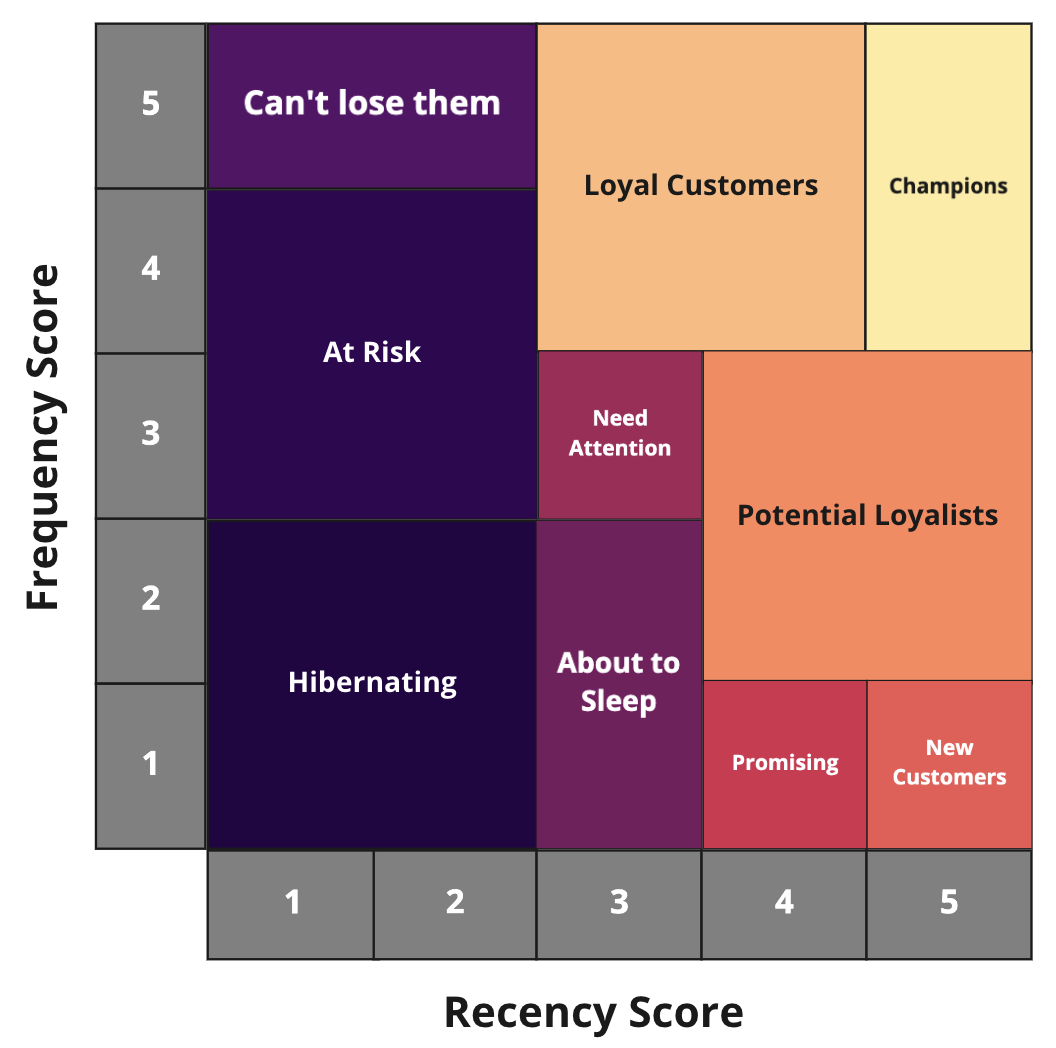

This is the guide for segmenting the customers. Based on certain combination of score, the company can define the most basic features and insights about the customers.


|**Segment**   |**Recency Score**     | **Frequency Score**   |   **Monetary Score**  |                                                     
|---   | --------- | -----------------------------------------------------------------------------------------------------------|   ----|
|Hibernating|1 - 2      | 1 - 2| 1 - 5|
|At risk|1 - 2     | 3 - 4|  1 - 5|
|Can't loose   |1 - 2    |5| 1 - 5|
|About to sleep   |3       | 1 - 2| 1 - 5|
|Need attention  |3 | 3| 1 - 5|
|Loyal customers   |3 - 4     |4 - 5| 1 - 5|
|Promising   |4   | 1| 1 - 5|
|New customers   |5       |1| 1 - 5|
|Potential loyalists|4 - 5 | 2 - 3| 1 - 5|
|Champions| 5 | 4 - 5| 1 - 5|

In [37]:
#Segmentation map
seg_code = {
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At risk',
    r'[1-2]5[1-5]' :'Cant lose them',
    r'3[1-2][1-5]' : 'About to sleep',
    r'33[1-5]' : 'Need attention',
    r'[3-4][4-5][1-5]' : 'Loyal customers',
    r'41[1-5]': 'Promising',
    r'51[1-5]': 'New customers',
    r'[4-5][2-3][1-5]' : 'Potential loyalists',
    r'5[4-5][1-5]' : 'Champions'
}

In [38]:
rfm['segment'] = rfm['RFM_score'].replace(seg_code, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
0,12346,325,1,77183.60,1,1,5,115,Hibernating
1,12347,1,7,4310.00,5,5,5,555,Champions
2,12348,74,4,1797.24,2,4,4,244,At risk
3,12349,18,1,1757.55,4,1,4,414,Promising
4,12350,309,1,334.40,1,1,2,112,Hibernating


In [39]:
#Summary info about our segments
segments= rfm.groupby("segment").agg({"CustomerID": "count"})
segments['percentage'] = round(rfm['segment'].value_counts(normalize=True)*100,2)
segments.reset_index(inplace=True)
segments.columns = ['segment', 'count','percentage']
segments.sort_values(by ='percentage', ascending=False, inplace=True)
segments

,segment,count,percentage
4,Hibernating,1065,24.54
5,Loyal customers,827,19.06
3,Champions,633,14.59
1,At risk,580,13.37
8,Potential loyalists,492,11.34
0,About to sleep,351,8.09
6,Need attention,186,4.29
9,Promising,100,2.30
2,Cant lose them,63,1.45
7,New customers,42,0.97


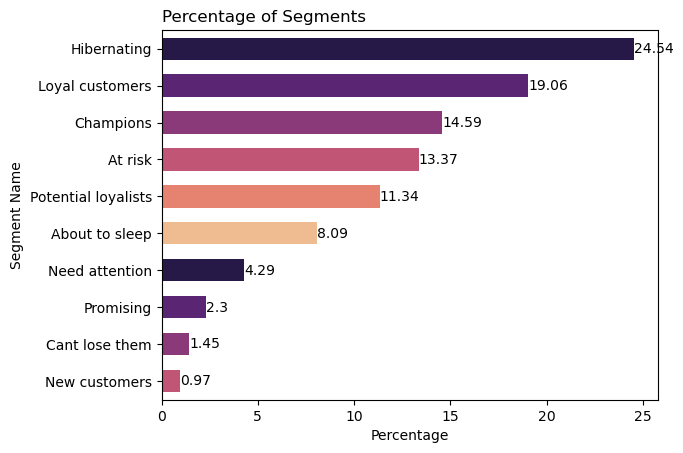

In [40]:
#Create a plot
seg_overview = sns.barplot(x = segments['percentage'], y = segments['segment'],palette = sns.color_palette('magma'),width = 0.6)

#Adjust elements
seg_overview.bar_label(seg_overview.containers[0])
plt.xlabel('Percentage')
plt.ylabel('Segment Name')
plt.title('Percentage of Segments',loc = 'left')
plt.show()

In [41]:
#Numerical figures of segments
agg_func = ["mean", "min", "max"]
rfm_info = rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(agg_func).round(1)
rfm_info

recency          frequency          monetary         \
                       mean min  max      mean min  max     mean    min   
segment                                                                   
About to sleep         52.5  33   71       1.2   1    2    459.0    6.2   
At risk               154.1  72  372       2.9   2    6   1072.9   52.0   
Cant lose them        131.4  72  371       8.4   6   34   2790.1   70.0   
Champions               4.9   0   12      12.4   3  210   6843.2  201.1   
Hibernating           216.9  72  373       1.1   1    2    486.7    3.8   
Loyal customers        32.5  13   71       6.5   3   63   2848.3   36.6   
Need attention         52.1  33   71       2.3   2    3    884.2    6.9   
New customers           5.9   0   11       1.0   1    1    385.0   89.9   
Potential loyalists    16.1   0   32       2.0   1    3   1030.1   20.8   
Promising              22.4  13   32       1.0   1    1    349.8    0.0   

                               
                          max  
segment                        
About to sleep         3528.3  
At risk               44534.3  
Cant lose them        10254.2  
Champions            280206.0  
Hibernating           77183.6  
Loyal customers      124914.5  
Need attention        12601.8  
New customers          3861.0  
Potential loyalists  168472.5  
Promising              6207.7

# 4. Solution

## 4.1. Review & Findings

#### EDA
- Most of the best-selling products are related to occasional events (Chirstmas, parties, etc.). For instance, **'POSTAGE', 'PAPER CRAFT , LITTLE BIRIDE', 'REGENCY CAKESTAND 3 TIER'**, etc.

- **'POSTAGE'** is ranked **no.1 of sales** in top 3 country.

- **Majority of the company's orders** came **from** the **United Kingdom** customers. Particularly, the rate of UK orders is about 9 times larger than Germany (ranked second) and 9.6 times higher than France (ranked third).

- The sales **wasn't stable in early months**, pretty **stable in the middle**, and **increased** clearly in the **last months**.

- The **highest sales** was **in Nov 2011**.

#### RFM Analysis
- More than **58%** of the company's customers are in '**Hibernating**' (24.54%), '**Loyal customers**' (19.06%), and '**Champions**' (14.59%). **This figure is pretty fine** to an e-commerce retail shop.


- Around **37%** accounted for '**At risk**' (13.37%), '**Potential loyalist**' (11.34%), '**About to Sleep**' (8.09%), '**Need attention**' (4.29%). To these subgroups, the company should have **specific strategies to improve their status**. 
> **Certained approaches** in these stages are **important** as it defines whether the customers keeps accompanying with the company or not. For example, to the '**About to sleep' group**, these customers' last purchases were quite far away, but the distance wasn't too large, the company can **prevent their comming hibernation** by **offer specific discounts and vouchers** to **increase the purchasing likelihood**.


- The left **5%** of '**Promising**' (2.3%), '**Can't lose them**' (1.45%), and '**New customers**' (0.97%) is also important. However, the percentage **wasn't too big to put all the focus on**. The company can **consider the current status** of the company's budget and operation and **approach these subgroups slowly and smartly**.

## 4.2. Recommendation

Based on the goals of strategies or plans, the company can **adapt the above findings** and **decide suitable steps**.
The table below shows **instances of adapting findings** into different departmental plans.

|**Planning**   | **Goal**   |   **Finding**  |   **Recommendation** |                                                  
|---   | --------- | ----------------------------------------------------------| -------------------------------------------|
|Sales Planning| Gain **higher total sales in last months** | **Sold products** in highest-earned month are **related to the Chirstmas**| **Diversify the products** that are related to Chirstmas event to **fulfil the customers' demands** **&rarr;** generate more revenue |
|Sales Planning| **Generate higher revenue from top customers**| '**Champions**' and '**Loyal customers**' accounts for **34%**, made up **a large portion of company's revenue** | Concentrate on keeping the **customers' trust** on product's quality and **satisfaction** about company's service. Some approaches are **personalized promotions** and **special rewards**, **proactive communications**, etc.|
|Stocking Planning| **Ensure availability** in last months| **Sold products** in these months are **related to the Chirstmas**. E.g. DOTCOM POSTAGE, NIGHT LIGHT, PAPER CHAIN KIT CHRISTMAS, etc.|**Prepare high-demand products** in end-year occasions, such as **POSTAGE, PAPER CRAFT, PAPER CHAIN KIT CHRISTMAS, CAKESTAND**, etc.
|Marketing Planning| **Get interaction** & later **generate sales from old-customer or vulnerable groups**| Around **50%** accounted for '**At risk**', '**Hibernating**' , '**About to Sleep**', '**Need attention**'. So, this rate is important to company's sales performance. | Suitable approaches: **personalized communications** or mails to **reconnect**, **limited-time promotions**, **personalized product recommendations**, **specific vouchers**, etc.

**N.B:** 
These are brief examples of adjusting the analysis's findings. The company can improve and reinforce these recommendations with its own business experience, the state of the company and other research/findings.

**Creator's Words**:

**Many thanks for reading my work!** This is the work dedicated to my personal portfolio and self-learning process.

I'd like to receive feedbacks, error checkings, or ideas for improvements.

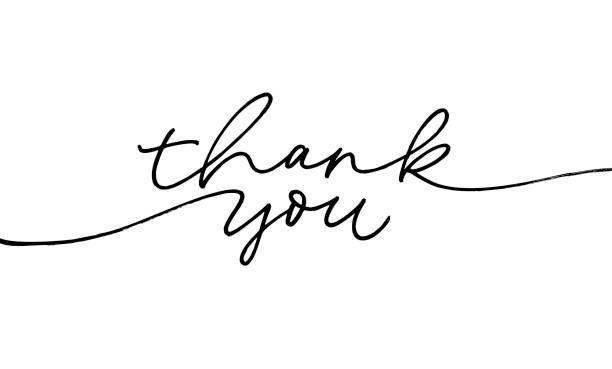